## 생선 분류 문제
- 도미, 빙어

In [1]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- 전체 데이터 길이 확인

In [2]:
# 도미 35개, 빙어 14개
print(len(bream_length), len(smelt_length))

35 14


## 데이터 시각화 

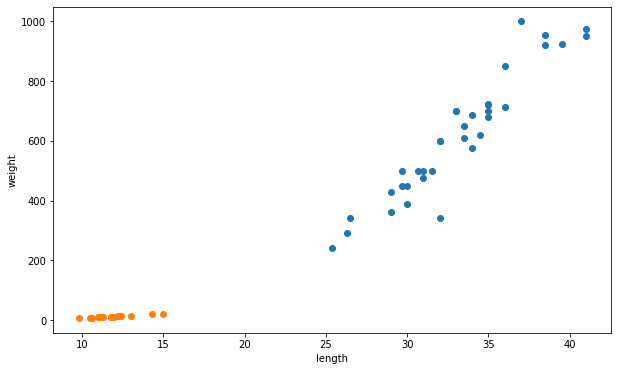

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(bream_length, bream_weight)
ax.scatter(smelt_length, smelt_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')

plt.show()

- 전체 데이터 만들기

In [4]:
length = bream_length + smelt_length 
weight = bream_weight + smelt_weight

print(len(length), len(weight))

49 49


### 리스트 컴프리헨션 (List Comprehension) 
- 반복문(조건문 포함)을 1줄로 처리
- 반환값은 리스트

In [5]:
temp_text = "humanEdu"
human_letters = []
for letter in temp_text:
  human_letters.append(letter)

print(human_letters)

['h', 'u', 'm', 'a', 'n', 'E', 'd', 'u']


In [6]:
temp_text = "humanEdu"
human_letters = [letter for letter in temp_text]

print(human_letters)

['h', 'u', 'm', 'a', 'n', 'E', 'd', 'u']


In [7]:
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


- 지도학습은 라벨이 필요하다. 
--> 종속변수, 타겟변수 (Response Variable, Dependent Variable)

In [8]:
# 도미 35개 1로 표시
# 빙어 14개 0로 표시
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 머신러닝 모형 구현
- KNN 구현

In [9]:
from sklearn.neighbors import KNeighborsClassifier 

# 모형 불러오기
kn = KNeighborsClassifier()

# 모형 학습
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [10]:
# 모형 평가
# 1.0의미 ==> 100% 정확도
kn.score(fish_data, fish_target)

1.0

In [11]:
# 예측 (= 배포)
new_data = [[30, 600]]
kn.predict(new_data) # 도미로 예측함

array([1])

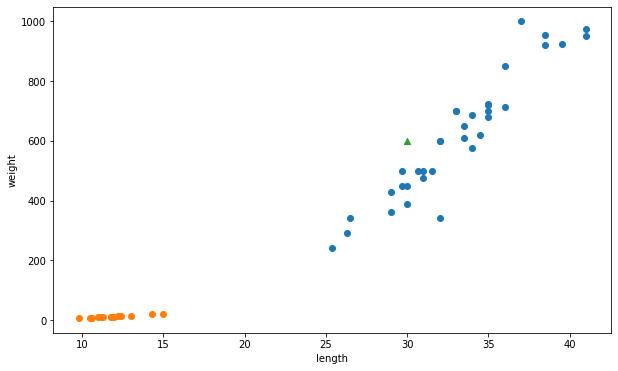

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(bream_length, bream_weight)
ax.scatter(smelt_length, smelt_weight)
ax.scatter(30, 600, marker = '^')
ax.set_xlabel('length')
ax.set_ylabel('weight')

plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier 

# 모형 불러오기
kn = KNeighborsClassifier(n_neighbors = 17)

# 모형 학습
kn.fit(fish_data, fish_target)

# 모형 평가
# 0.71의미 ==> 71% 정확도
kn.score(fish_data, fish_target)

1.0

In [25]:
for n in range(5, 50):
  # 최근접 이웃 개수 설정
  kn.n_neighbors = n

  # 스코어 계산
  score = kn.score(fish_data, fish_target)

  # 1.0에 미치지 못하는 이웃 개수 경계선 구하기
  if score < 1:
    print(n, score)
    break

18 0.9795918367346939


## 머신러닝 중요 메서드
- fit() : 훈련시 사용하는 메서드, 두개의 데이터가 들어감. 
  + 독립변수 : fish_data (길이, 몸무게)
  + 종속변수 : fish_target

- predict() : 예측할 때 사용
  + 새로운 데이터 : 독립변수만 추가

- score() : 모형의 성능 평가
  + 실전 : 평가지표 함수를 사용!

## 훈련 세트와 테스트 세트
- 기존 모델의 문제점
- 예측값, 평가지표 산출 시, 100% 
- 훈련 세트 : 훈련 시에 사용되는 데이터
- 테스트 세트 : 평가 시에 사용되는 데이터


In [26]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [27]:
fish_data[44:]

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]

In [ ]:
train_input